<a href="https://colab.research.google.com/github/Gcango/Analise_Descritiva_PNAD_2015/blob/main/Analise_Descritiva_dados_PNAD_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exercicio no âmbito do curso de Data Science da ALURA
Trabalho de Análise Descritiva de um Conjunto de Dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.
O Objectivo foi responder as questões que se vão desenrolando a nível do Coolab.
A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
df = sns.load_dataset("penguins")

In [91]:
dados = pd.read_csv("/content/dados-2.csv")

In [92]:
dados.head(5)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [93]:
print(f"A base de dados da PNAD 2015 possui {dados.shape[0]} linhas e {dados.shape[1]} colunas ")

A base de dados da PNAD 2015 possui 76840 linhas e 7 colunas 


In [94]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [95]:
dados.describe()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


In [96]:
dados.isnull().sum()

UF                0
Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
Altura            0
dtype: int64

In [97]:
dados.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

##Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:
<b>A</b> ► Acima de 25 SM
<b>B</b> ► De 15 a 25 SM
<b>C</b> ► De 5 a 15 SM
<b>D</b> ► De 2 a 5 SM
<b>E</b> ► Até 2 SM
Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

In [98]:
#1) - Define os intevalos das classes em reais (R$)

In [99]:
classes = [
    dados.Renda.min(),
    2 * 788,
    5 * 788,
    15 * 788,
    25 * 788,
    dados.Renda.max()
]
classes

[0, 1576, 3940, 11820, 19700, 200000]

In [100]:
#2) - Define os labels das classes

In [101]:
labels = ['E', 'D', 'C', 'B', 'A']
labels

['E', 'D', 'C', 'B', 'A']

In [102]:
#3) - Construa a coluna de frequências

In [103]:
frequencia = pd.value_counts(
  pd.cut(x = dados.Renda,
         bins = classes,
         labels = labels,
         include_lowest = True)
)
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

In [104]:
#4) - Construa a coluna de pecentuais

In [105]:
percentual = pd.value_counts(
  pd.cut(x = dados.Renda,
         bins = classes,
         labels = labels,
         include_lowest = True),
  normalize = True
) * 100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

In [106]:
#5) - Junta as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [107]:
dist_freq_renda = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_renda.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


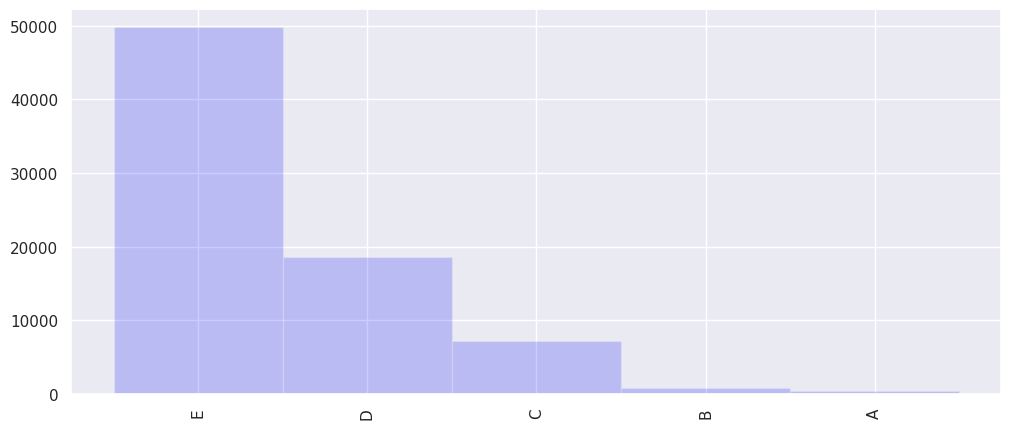

In [108]:
#6) - Insirindo Gráfico para visualizar as variaveis Frequências e Percentagem
dist_freq_renda['Frequência'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize=(12, 5));

In [109]:
#7) - Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset. Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)¶

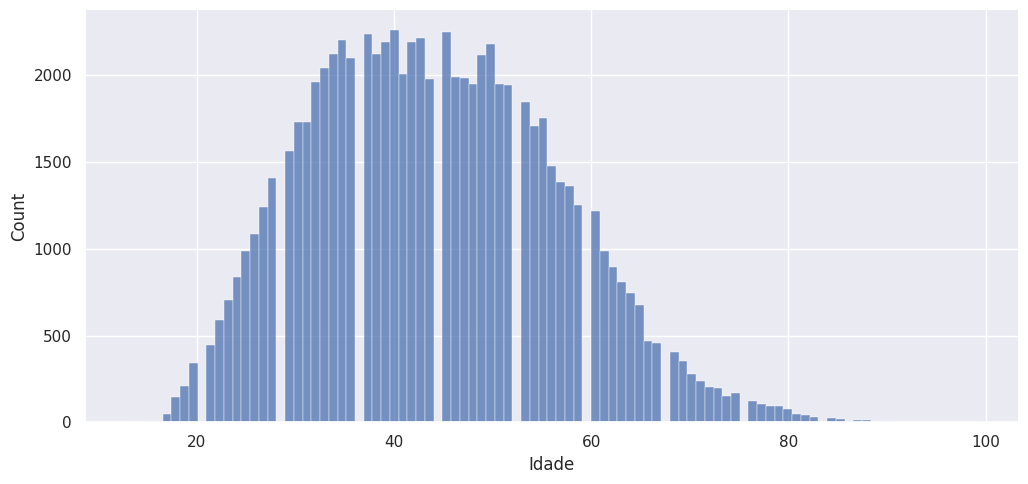

In [110]:
plot = sns.displot(dados['Idade'])
plot.figure.set_size_inches(12, 5)
#plot.set_title('Distribuição de Frequências - IDADE', fontsize=18 )
#plot.set_xlabel('Anos', fontsize=14)
plt.show()

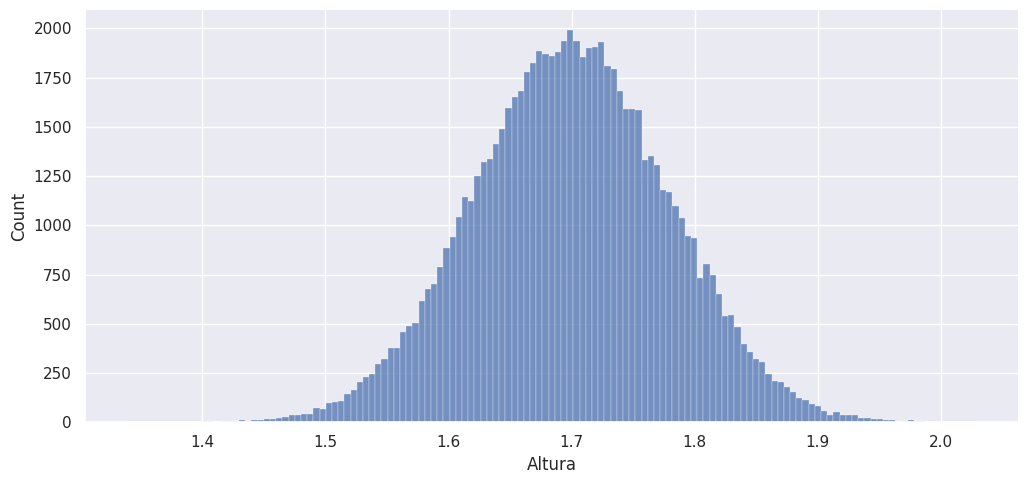

In [111]:
plot = sns.displot(dados['Altura'])
plot.figure.set_size_inches(12, 5)
#plot.set_title('Distribuição de Frequências - ALTURA', fontsize=18)
#plot.set_xlabel('Metros', fontsize7=14)
plt.show()

<ipython-input-112-d793cf1e8898>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Renda'])


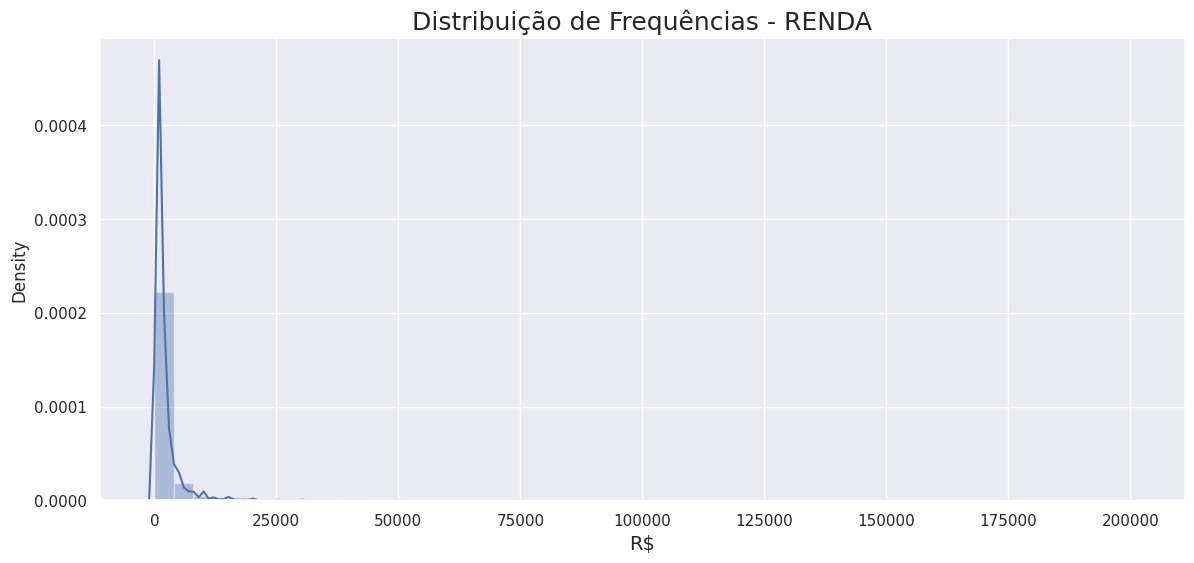

In [112]:
ax = sns.distplot(dados['Renda'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - RENDA', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax
plt.show()

In [113]:
#8) - Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<ipython-input-114-3f51dc3a2828>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.query('Renda < 20000')['Renda'])


<Axes: title={'center': 'Distribuição de Frequências - RENDA - Pessoas com renda até R$ 20.000,00'}, xlabel='R$', ylabel='Density'>

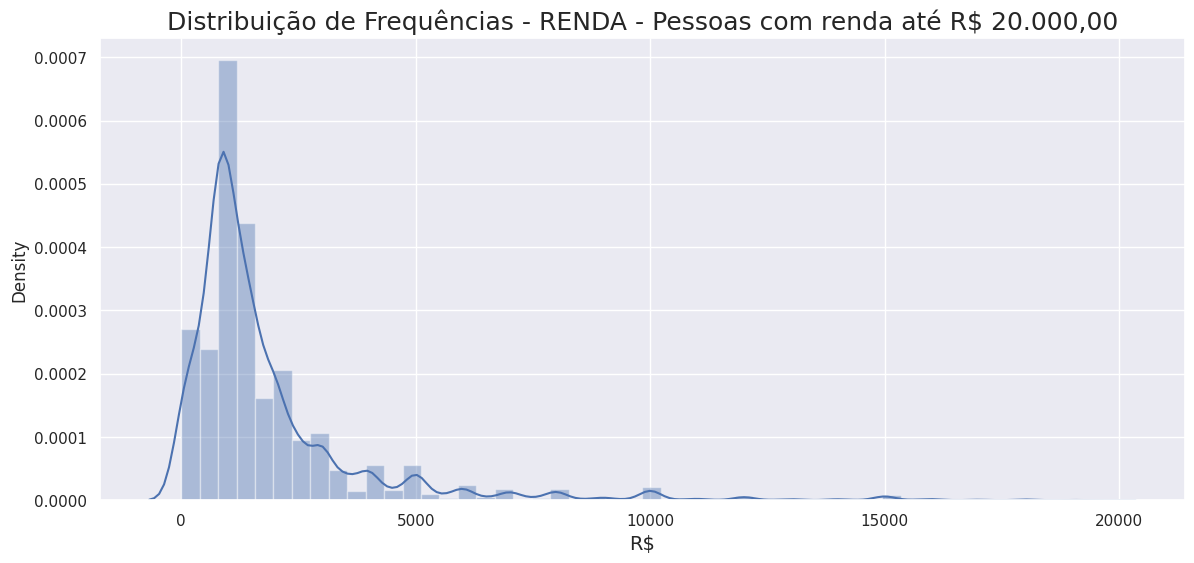

In [114]:
ax = sns.distplot(dados.query('Renda < 20000')['Renda'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - RENDA - Pessoas com renda até R$ 20.000,00', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

In [115]:
#9) - Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#Avalie o resultado da tabela e escreva suas principais conclusões, Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto

In [116]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [117]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor
                        )
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [118]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         normalize = True
                        ) * 100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [119]:
#10) - Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento.
#Obtenha a média aritimética, mediana, moda, desvio médio padrão, variança e desvio padrão

In [120]:
print(f"A Média dos dados da variavel [Renda] é de: {dados.Renda.mean()} ")
print(f"A Mediana da variavel [Renda] é de: {dados.Renda.median()} ")
print(f"A Moda da variavel [Renda] é de: {dados.Renda.mode()[0]} ")
print(f"A Variança da variavel [Renda] é de: {dados.Renda.var()}")
print(f"O desvio Padrão da variavel [Renda] é de: {dados.Renda.std()}")

A Média dos dados da variavel [Renda] é de: 2000.3831988547631 
A Mediana da variavel [Renda] é de: 1200.0 
A Moda da variavel [Renda] é de: 788 
A Variança da variavel [Renda] é de: 11044906.006217021
O desvio Padrão da variavel [Renda] é de: 3323.3877303464037


In [121]:
dados['Renda'].mad()
#print(f"O desvio médio absoluto da variavel [Renda] é de: {dados.Renda.mad()}")

<ipython-input-121-26250e5e80f1>:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  dados['Renda'].mad()


1526.4951371638058

In [122]:
#11) - Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#Destaque os pontos mais importante que você observa nas tabulações

In [123]:
renda_estatisticas_por_sexo_e_cor = pd.crosstab(dados.Cor,
                                                dados.Sexo,
                                                values = dados.Renda,
                                                aggfunc = {'mean', 'median', 'max'})
renda_estatisticas_por_sexo_e_cor.rename(index = cor, inplace = True)
renda_estatisticas_por_sexo_e_cor.rename(columns = sexo, inplace = True)
renda_estatisticas_por_sexo_e_cor

max                  mean                 median         
Sexo     Masculino Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                     
Indígena     10000   120000  1081.710938  2464.386139     797.5    788.0
Branca      200000   100000  2925.744435  2109.866750    1700.0   1200.0
Preta        50000    23000  1603.861687  1134.596400    1200.0    800.0
Amarela      50000    20000  4758.251064  3027.341880    2800.0   1500.0
Parda       100000    30000  1659.577425  1176.758516    1200.0    800.0

In [124]:
#12) - Construa um box plot da variável RENDA segundo SEXO e COR


<ipython-input-125-2e53502da570>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)    # Configurando o label de cada categoria do eixo Y


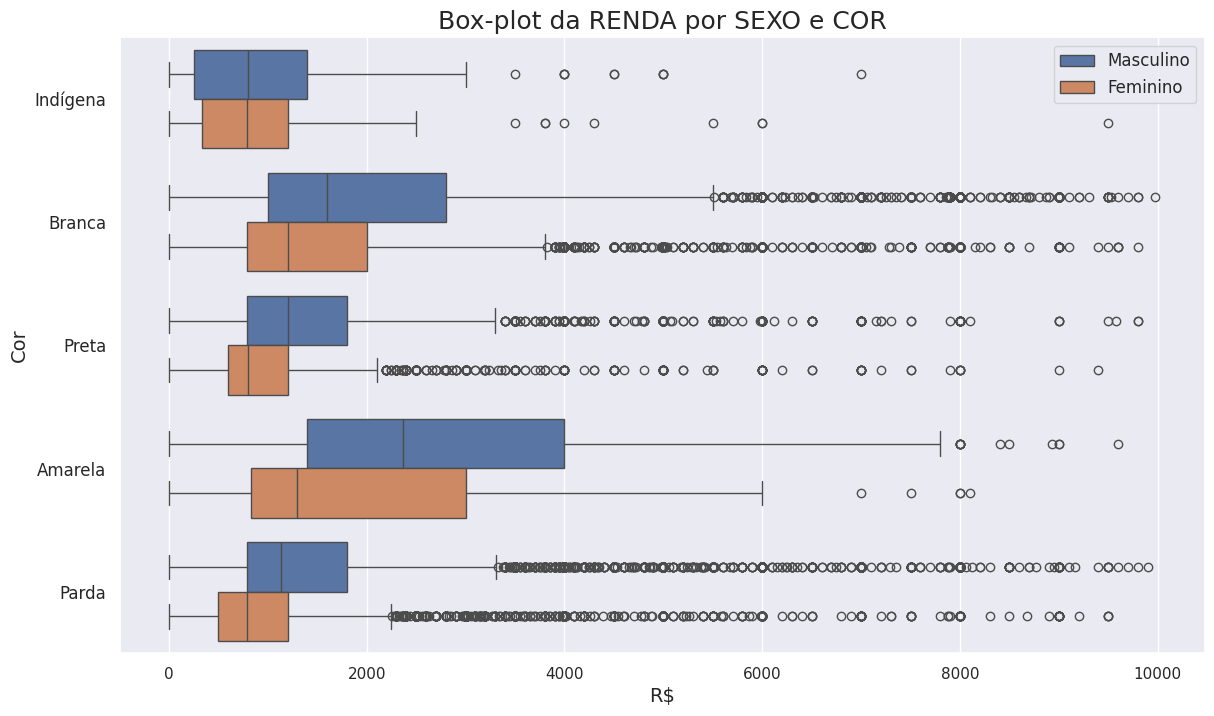

In [125]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data=dados.query('Renda < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por SEXO e COR', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Cor', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax
plt.show()

In [126]:
#13) - Qual percentual de pessoas de nosso dataset ganham um salário mínimo (R$ 788,00) ou menos?¶


In [127]:
from scipy import stats

percentual = stats.percentileofscore(dados.Renda, 788, kind = 'weak')
print(" O percentual de pessoas de nosso dataset que ganham um salario minimo é de {0:.2f}%".format(percentual))

 O percentual de pessoas de nosso dataset que ganham um salario minimo é de 28.87%


In [128]:
#14) - Qual o valor máximo ganho por 99% das pessoas de nosso dataset?

In [129]:
valor = dados.Renda.quantile(.99)
print(" 99% das pessoas do nosso dataset ganham em torno de R$ {0:.2f}".format(valor))

 99% das pessoas do nosso dataset ganham em torno de R$ 15000.00


In [130]:
#15) - Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO¶

In [131]:
renda_estatisticas_por_sexo_e_estudo = pd.crosstab(dados['Anos de Estudo'],
                                         dados.Sexo,
                                         aggfunc = {'mean', 'median', 'max', 'std'},
                                         values = dados.Renda).round(2)
renda_estatisticas_por_sexo_e_estudo.rename(index = anos_de_estudo, inplace = True)
renda_estatisticas_por_sexo_e_estudo.rename(columns = sexo, inplace = True)
renda_estatisticas_por_sexo_e_estudo

max               mean           \
Sexo                           Masculino Feminino Masculino Feminino   
Anos de Estudo                                                         
Sem instrução e menos de 1 ano     30000    10000    799.49   516.20   
1 ano                              30000     2000    895.63   492.77   
2 anos                             40000     4000    931.18   529.91   
3 anos                             80000     3500   1109.20   546.85   
4 anos                             50000    10000   1302.33   704.28   
5 anos                             35000     8000   1338.65   781.39   
6 anos                             25000     6000   1448.88   833.73   
7 anos                             40000     9000   1465.50   830.75   
8 anos                             30000    18000   1639.40   933.62   
9 anos                             60000    20000   1508.04   868.02   
10 anos                            45000     6000   1731.27   925.92   
11 anos                           200000   100000   2117.06  1286.79   
12 anos                            30000   120000   2470.33  1682.31   
13 anos                            25000    20000   3195.10  1911.73   
14 anos                            50000    20000   3706.62  2226.46   
15 anos ou mais                   200000   100000   6134.28  3899.51   
Não determinados                    7000     3000   1295.76   798.17   

                                  median                std           
Sexo                           Masculino Feminino Masculino Feminino  
Anos de Estudo                                                        
Sem instrução e menos de 1 ano     700.0    390.0   1023.90   639.31  
1 ano                              788.0    400.0   1331.95   425.29  
2 anos                             788.0    450.0   1435.17   498.23  
3 anos                             800.0    500.0   2143.80   424.12  
4 anos                            1000.0    788.0   1419.82   629.55  
5 anos                            1045.0    788.0   1484.65   635.78  
6 anos                            1200.0    788.0   1476.63   574.55  
7 anos                            1200.0    788.0   1419.71   602.04  
8 anos                            1300.0    800.0   1515.58   896.78  
9 anos                            1200.0    788.0   2137.66   973.22  
10 anos                           1218.0    800.0   2078.61   620.61  
11 anos                           1500.0   1000.0   2676.54  1819.04  
12 anos                           1800.0   1200.0   2268.08  4851.83  
13 anos                           2400.0   1300.0   2797.12  2053.79  
14 anos                           2500.0   1600.0   3987.21  2064.08  
15 anos ou mais                   4000.0   2800.0   7447.61  4212.77  
Não determinados                  1200.0    788.0    979.65   459.99

In [132]:
#16) - Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO

<ipython-input-133-24857ddc7ec5>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y


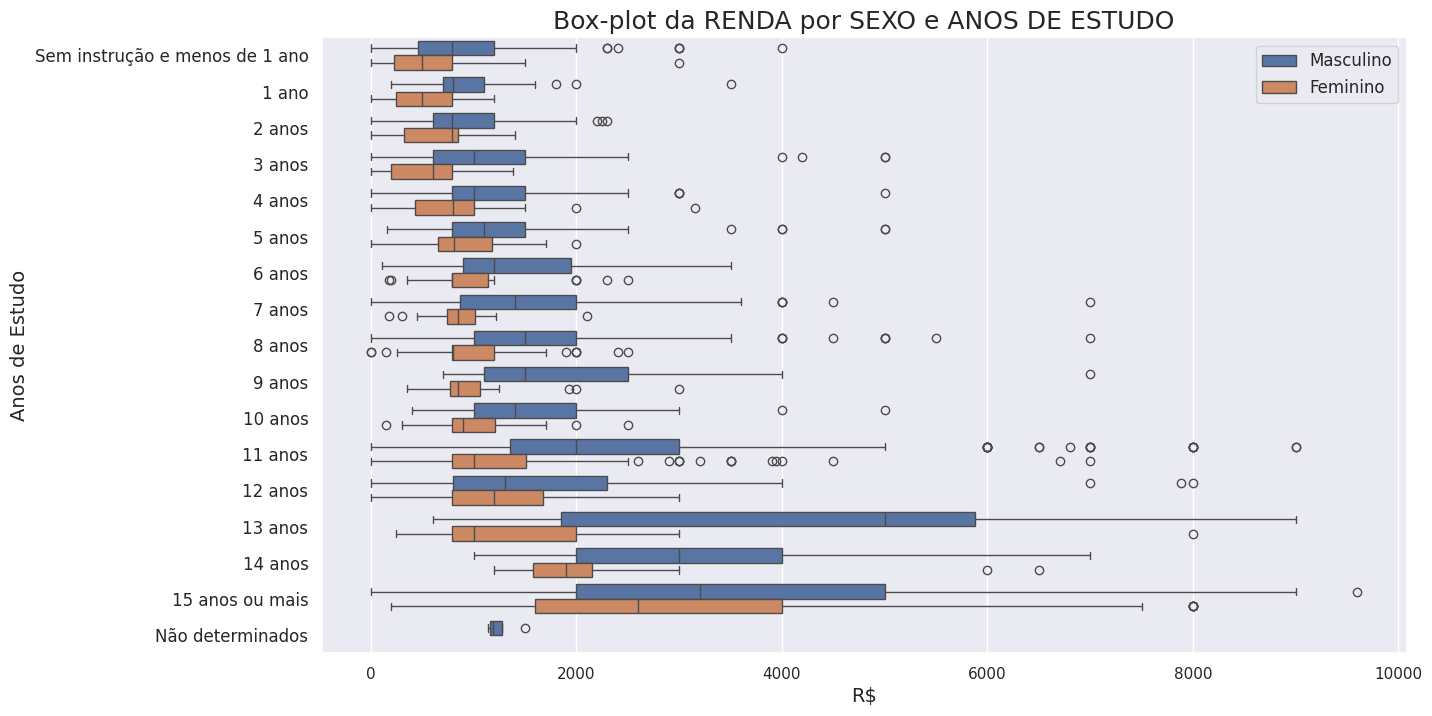

In [133]:
ax = sns.boxplot(x = 'Renda', y = 'Anos de Estudo', hue = 'Sexo', data=dados.query('Renda < 10000 and Idade == 50'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por SEXO e ANOS DE ESTUDO', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Anos de Estudo', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax
plt.show()

In [134]:
#17)Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO

In [135]:
renda_estatisticas_por_uf = dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})
renda_estatisticas_por_uf.rename(index = uf)

Renda                             
                            mean  median     max          std
UF                                                           
Rondônia             1789.761223  1200.0   50000  2406.161161
Acre                 1506.091782   900.0   30000  2276.233415
Amazonas             1445.130100   900.0   22000  1757.935591
Roraima              1783.588889  1000.0   20000  2079.659238
Pará                 1399.076871   850.0   50000  2053.779555
Amapá                1861.353516  1200.0   15580  2020.688632
Tocantins            1771.094946  1000.0   60000  2934.590741
Maranhão             1019.432009   700.0   30000  1887.816905
Piauí                1074.550784   750.0   40000  2373.355726
Ceará                1255.403692   789.0   25000  1821.963536
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Paraíba              1293.370487   788.0   30000  1950.272431
Pernambuco           1527.079319   900.0   50000  2389.622497
Alagoas              1144.552602   788.0   11000  1237.856197
Sergipe              1109.111111   788.0   16000  1478.997878
Bahia                1429.645094   800.0  200000  3507.917248
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
São Paulo            2638.104986  1600.0   80000  3503.777366
Paraná               2493.870753  1500.0  200000  4302.937995
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Goiás                1994.580794  1500.0   30000  2221.933065
Distrito Federal     4241.954722  2000.0  100000  5550.463338

In [136]:
#18) - Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.
#1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000

<ipython-input-137-f23f36fd55e6>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([key for key in uf.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y


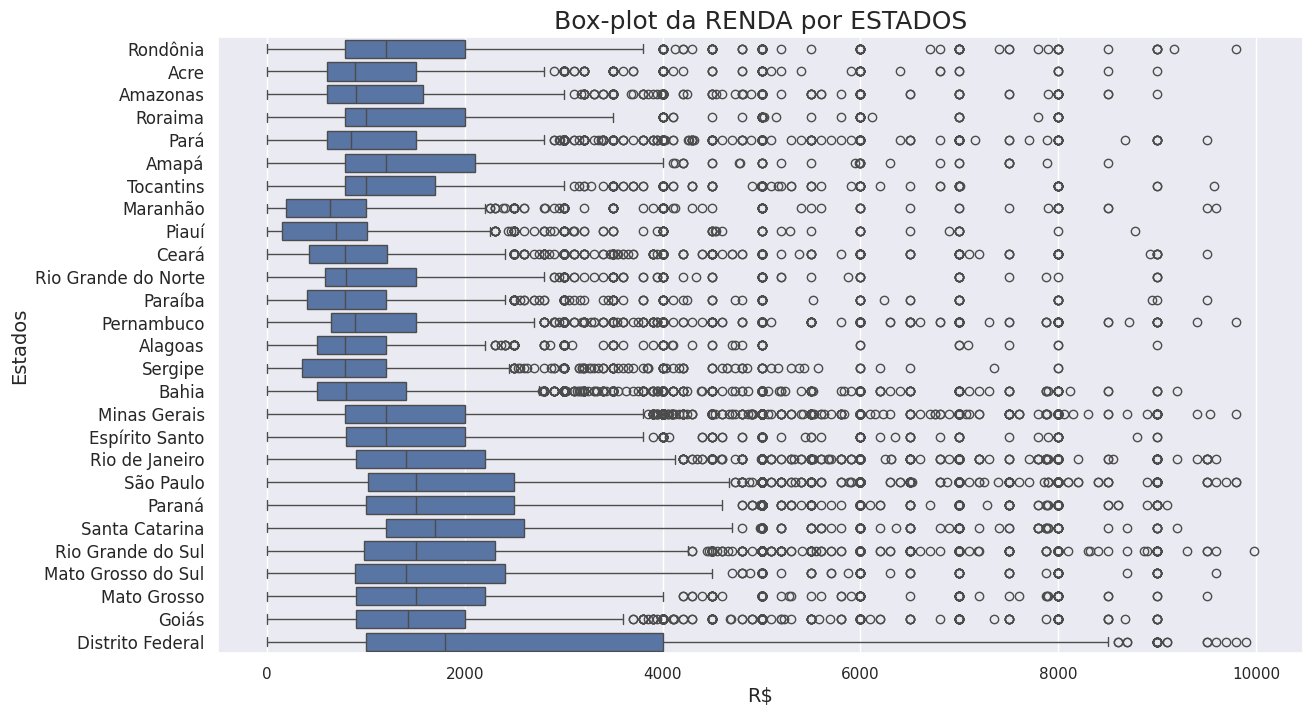

In [137]:
ax = sns.boxplot(x = 'Renda', y = 'UF', data=dados.query('Renda < 10000'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da RENDA por ESTADOS', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('R$', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Estados', fontsize=14)    # Configurando o label do eixo Y
ax.set_yticklabels([key for key in uf.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

ax
plt.show()

#Trabalho sobre Probabilidades, Amostragem e Estimações Utilizando os conhecimentos adquiridos em nosso treinamento.

# <font color='green'>Problema A</font>

Avaliando nosso dataset é possível verificar que a **proporção de homens** como chefes de domicílios é de quase **70%**. Precisamos **selecionar aleatoriamente grupos de 10 indivíduos** para verificar as diferenças entre os rendimentos em cada grupo. Qual a **probabilidade de selecionamos um grupo que apresente a mesma proporção da população**, ou seja, selecionarmos um grupo que seja **composto por 7 homens e 3 mulheres**?

#### <font color='blue'>Como tarefa extra, verifique a real proporção de homens e mulheres em nosso dataset (vimos como fazer isso em nosso primeiro curso de estatística).</font>

#### <font color='red'>Verifique que tipo de distribuição de probabilidade se encaixa neste experimento.</font>

In [138]:
import pandas as pd
import numpy as np
from scipy.stats import binom
from scipy.stats import norm

In [139]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [140]:
k = 7


In [141]:
n = 10

In [142]:
p = 0.70

In [143]:
probabilidade = binom.pmf(k, n, p)
print('%0.8f' % (probabilidade))

0.26682793


# <font color='green'>Problema B</font>

Ainda sobre a questão anterior, **quantos grupos de 10 indivíduos** nós precisaríamos selecionar, de forma aleatória, para conseguir **100 grupos compostos por 7 homens e 3 mulheres**?

#### <font color='red'>Lembre-se da forma de cálculo da média de uma distribuição binomial</font>

In [145]:
n = 100 / probabilidade
n = int(n.round())
n

375

# <font color='green'>Problema C</font>

Um cliente nos encomendou um estudo para avaliar o **rendimento dos chefes de domicílio no Brasil**. Para isso precisamos realizar uma nova coleta de dados, isto é, uma nova pesquisa de campo. Após reunião com o cliente foi possível elencar o seguinte conjunto de informações:

> A. O resultado da pesquisa precisa estar pronto em **2 meses**;

> B. Teremos somente **R$\$$ 150.000,00** de recursos para realização da pesquisa de campo; e
    
> C. Seria interessante uma **margem de erro não superior a 10% em relação a média estimada**.

Em nossa experiência com estudos deste tipo, sabemos que o **custo médio por indivíduo entrevistado fica em torno de R$\$$ 100,00**. Com este conjunto de fatos avalie e obtenha o seguinte conjunto de informações para passar ao cliente:


> 1. Para obter uma estimativa para os parâmetros da população (renda dos chefes de domicílio no Brasil), realize uma amostragem aleatória simples em nosso conjunto de dados. Essa amostra deve conter 200 elementos (utilize random_state = 101 para garantir que o mesmo experimento posso ser realizado novamente). Obtenha a média e o desvio-padrão dessa amostra.
    
> 2. Para a **margem de erro** especificada pelo cliente obtenha os **tamanhos de amostra** necessários para garantir os **níveis de confiança de 90%, 95% e 99%**.
    
> 3. Obtenha o **custo da pesquisa** para os três níveis de confiança.
    
> 4. Para o maior nível de confiança viável (dentro do orçamento disponível), obtenha um **intervalo de confiança para a média da população**.
    
> 5. Assumindo o **nível de confiança escolhido no item anterior**, qual **margem de erro** pode ser considerada utilizando todo o recurso disponibilizado pelo cliente?
    
> 6. Assumindo um **nível de confiança de 95%**, **quanto a pesquisa custaria ao cliente** caso fosse considerada uma **margem de erro de apenas 5%** em relação a média estimada?

In [148]:
dataset = dados.Renda.sample(n = 200, random_state = 101)

In [149]:
dataset.mean()

1964.205

In [150]:
dataset.std()

3139.8855167452093

In [ ]:
#dados do Problema

In [152]:
media_amostra = dataset.mean()
desvio_padrao_amostra = dataset.std()
recursos = 150000
custo_entrevista = 100

### Obtenha a margem de erro

#### <font color='red'>Lembre-se que a margem de erro deve estar na mesma unidade da variável que está sendo estudada (R$)</font>

In [153]:
e = 0.10 * media_amostra
print('A margem de erro é de R$ %0.2f para mais ou para menos' % (e))

A margem de erro é de R$ 196.42 para mais ou para menos


In [ ]:
#Tamanho da Amostra

In [154]:
0.5 + (0.9 / 2)

0.95

In [155]:
z = norm.ppf(.95)
n_confianca_90 = (z * (desvio_padrao_amostra / e)) ** 2
n_confianca_90 = int(n_confianca_90.round())
print('Para um nível de confiança de 90%% devemos selecionar uma amostra de %s elementos.' % n_confianca_90)

Para um nível de confiança de 90% devemos selecionar uma amostra de 691 elementos.


In [ ]:
#Tamanho amostral

In [156]:
0.5 + (0.95 / 2)

0.975

In [157]:
z = norm.ppf(.975)
n_confianca_95 = (z * (desvio_padrao_amostra / e)) ** 2
n_confianca_95 = int(n_confianca_95.round())
print('Para um nível de confiança de 95%% devemos selecionar uma amostra de %s elementos.' % n_confianca_95)

Para um nível de confiança de 95% devemos selecionar uma amostra de 982 elementos.


In [ ]:
#Tamanho amostral

In [158]:
0.5 + (0.99 / 2)

0.995

In [159]:
z = norm.ppf(.995)
n_confianca_99 = (z * (desvio_padrao_amostra / e)) ** 2
n_confianca_99 = int(n_confianca_99.round())
print('Para um nível de confiança de 99%% devemos selecionar uma amostra de %s elementos.' % n_confianca_99)

Para um nível de confiança de 99% devemos selecionar uma amostra de 1695 elementos.


### Custo da pesquisa para o nível de confiança de 90%

In [160]:
custo_confianca_90 = n_confianca_90 * custo_entrevista
print('Para um nível de confiança de 90% o custo da pesquisa seria de R$ {:,.2f}.'.format(custo_confianca_90))

Para um nível de confiança de 90% o custo da pesquisa seria de R$ 69,100.00.


### Custo da pesquisa para o nível de confiança de 95%

In [161]:
custo_confianca_95 = n_confianca_95 * custo_entrevista
print('Para um nível de confiança de 95% o custo da pesquisa seria de R$ {:,.2f}.'.format(custo_confianca_95))

Para um nível de confiança de 95% o custo da pesquisa seria de R$ 98,200.00.


### Custo da pesquisa para o nível de confiança de 99%

In [162]:
custo_confianca_99 = n_confianca_99 * custo_entrevista
print('Para um nível de confiança de 99% o custo da pesquisa seria de R$ {:,.2f}.'.format(custo_confianca_99))

Para um nível de confiança de 99% o custo da pesquisa seria de R$ 169,500.00.


In [ ]:
#Solução - 4 item

In [165]:
intervalo = norm.interval(confidence = 0.95, loc = media_amostra, scale = desvio_padrao_amostra / np.sqrt(n_confianca_95))
intervalo

(1767.8209732805094, 2160.5890267194904)

In [164]:
#Solução - 5 item

In [166]:
n_confianca_95 = recursos / custo_entrevista
n_confianca_95

1500.0

In [167]:
z = norm.ppf(.975)
e = z * (desvio_padrao_amostra / np.sqrt(n_confianca_95))
e

158.89721122673703

In [168]:
e_percentual = e / media_amostra
e_percentual * 100
print('A nova margem de erro é {:.2f}%.'.format(e_percentual * 100))

A nova margem de erro é 8.09%.


In [ ]:
#Solução - 6 item

In [169]:
e = 0.05 * media_amostra
print('A margem de erro é de R$ %0.2f para mais ou para menos' % (e))

A margem de erro é de R$ 98.21 para mais ou para menos


In [170]:
z = norm.ppf(.975)
n_confianca_95 = (z * (desvio_padrao_amostra / e)) ** 2
n_confianca_95 = int(n_confianca_95.round())
print('Para um nível de confiança de 95%% devemos selecionar uma amostra de %s elementos.' % n_confianca_95)

Para um nível de confiança de 95% devemos selecionar uma amostra de 3927 elementos.


In [171]:
custo_confianca_95 = n_confianca_95 * custo_entrevista
print('Para um nível de confiança de 95% o custo da pesquisa seria de R$ {:,.2f}.'.format(custo_confianca_95))

Para um nível de confiança de 95% o custo da pesquisa seria de R$ 392,700.00.
